# Approach One: DeepLabV3


In [2]:
import torch
from PIL import Image
from torchvision import transforms
from google.colab import files
from io import BytesIO
from PIL import Image
import urllib
import matplotlib.pyplot as plt

In [3]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


  0%|          | 0.00/161M [00:00<?, ?B/s]

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [4]:
uploaded = files.upload()

Saving test1.jpg to test1.jpg


In [5]:
im1 = Image.open(BytesIO(uploaded['test1.jpg']))

In [6]:
uploaded = files.upload()

Saving test2.jpg to test2.jpg


In [7]:
im2 = Image.open(BytesIO(uploaded['test2.jpg']))

In [14]:
url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "deeplab1.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [9]:
input_image = im1.convert("RGB")
preprocess = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) 
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

In [10]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")
r1 = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r1.putpalette(colors)

In [11]:
input_image = im2.convert("RGB")
preprocess = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) 
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

In [12]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")
r2 = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r2.putpalette(colors)

In [15]:
im3 = Image.open(filename)
input_image = im3.convert("RGB")
preprocess = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) 
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

In [16]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")
r3 = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r3.putpalette(colors)

## Single Class Segmentation

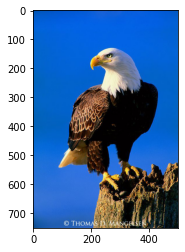

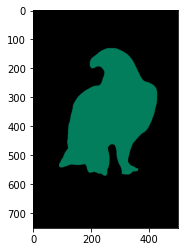

In [17]:
plt.imshow(im1)
plt.show()
plt.imshow(r1)
plt.show()

## Two Classes Segmentation


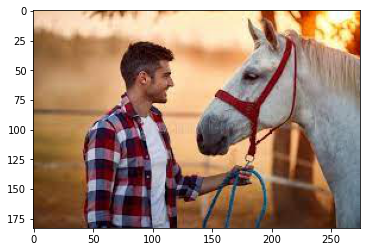

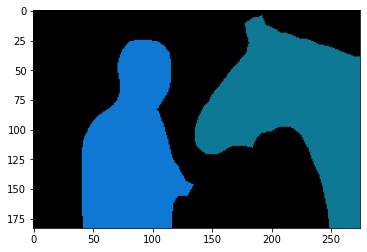

In [18]:
plt.imshow(im2)
plt.show()
plt.imshow(r2)
plt.show()

## Multi Classes Segmentation


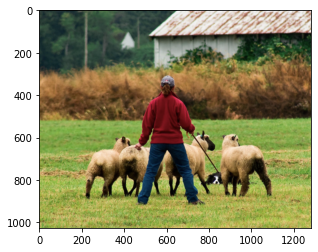

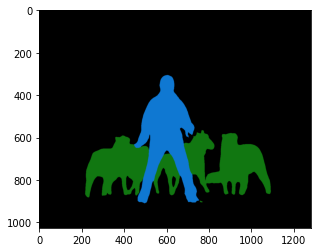

In [19]:
plt.imshow(im3)
plt.show()
plt.imshow(r3)
plt.show()

# Approach Two: FCN




In [20]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet50', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth


  0%|          | 0.00/135M [00:00<?, ?B/s]

In [21]:
input_image = im1.convert("RGB")
preprocess = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) 
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

In [22]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")
r1 = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r1.putpalette(colors)

In [23]:
input_image = im2.convert("RGB")
preprocess = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) 
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

In [24]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")
r2 = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r2.putpalette(colors)

In [25]:
im3 = Image.open(filename)
input_image = im3.convert("RGB")
preprocess = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) 
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

In [26]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")
r3 = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r3.putpalette(colors)

## Single Class Segmentation

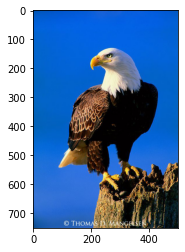

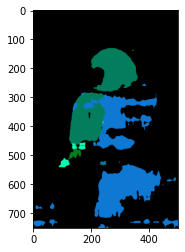

In [27]:
plt.imshow(im1)
plt.show()
plt.imshow(r1)
plt.show()

## Two Classes Segmentation

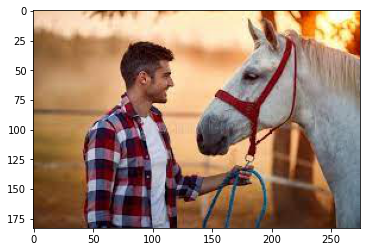

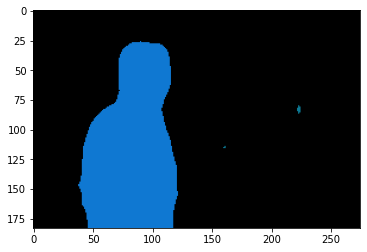

In [28]:
plt.imshow(im2)
plt.show()
plt.imshow(r2)
plt.show()

## Multi Classes Segmentation

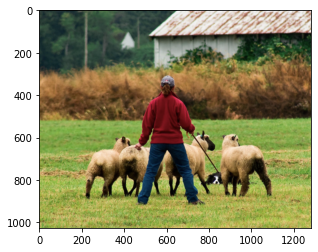

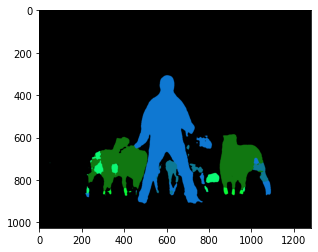

In [29]:
plt.imshow(im3)
plt.show()
plt.imshow(r3)
plt.show()